In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [12, 8]

In [16]:
fixed_model_columns = [
    'firmhash',
    'firm',
    'sector',
]

In [17]:
df_model = pd.read_csv('../data/modelinput/information_governance_clean_dataset.csv')

In [18]:
df_model.dtypes

firmhash                               int64
firm                                  object
sector                                object
reputation_score_2020                float64
composite_relational_ig_practises    float64
composite_formal_ig_practises        float64
return_on_assets                     float64
log_n_employees                      float64
csr_index                            float64
sqrt_n_data_breaches                 float64
sqrt_age_in_years                    float64
dummy_sector_Health Care             float64
dummy_sector_Technology              float64
dummy_sector_Media                   float64
dummy_sector_Energy                  float64
dummy_sector_Financials              float64
dummy_sector_Retailing               float64
dummy_sector_Industrials             float64
dummy_sector_Business Services       float64
dummy_sector_Household Products      float64
dummy_sector_Transportation          float64
dummy_sector_Telecommunications      float64
young_firm

In [19]:
print(f'n sample size: {len(df_model)}')

n sample size: 138


In [20]:
sector_firm_count = df_model.groupby(['sector'])[['firm']].count()
sector_firm_count.sort_values('firm', ascending=False)

,firm
sector,
Technology,28
Health Care,25
Financials,24
Retailing,13
Business Services,9
Energy,8
Transportation,8
Household Products,7
Industrials,7


<AxesSubplot:>

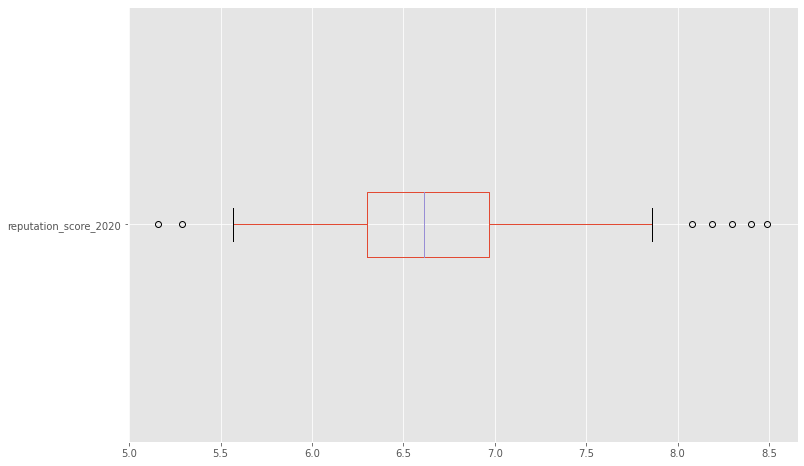

In [21]:
df_model[['reputation_score_2020']].boxplot(vert=False)

array([[<AxesSubplot:title={'center':'log_n_employees'}>]], dtype=object)

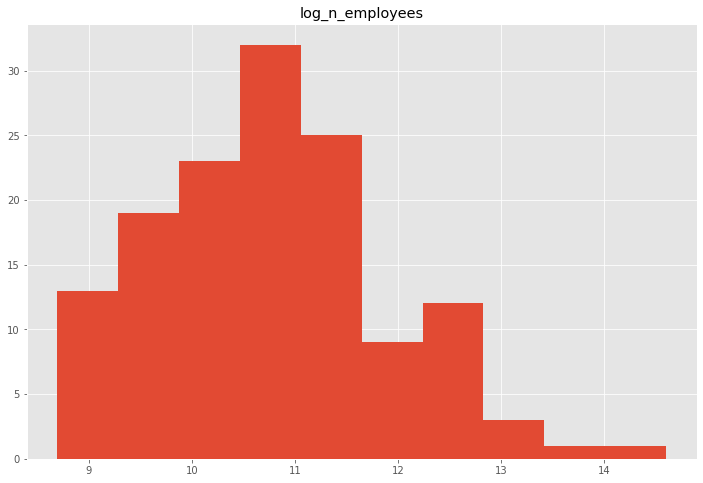

In [22]:
df_model[['log_n_employees']].hist()

In [23]:
corr_columns = [c for c in df_model.columns if c not in fixed_model_columns]

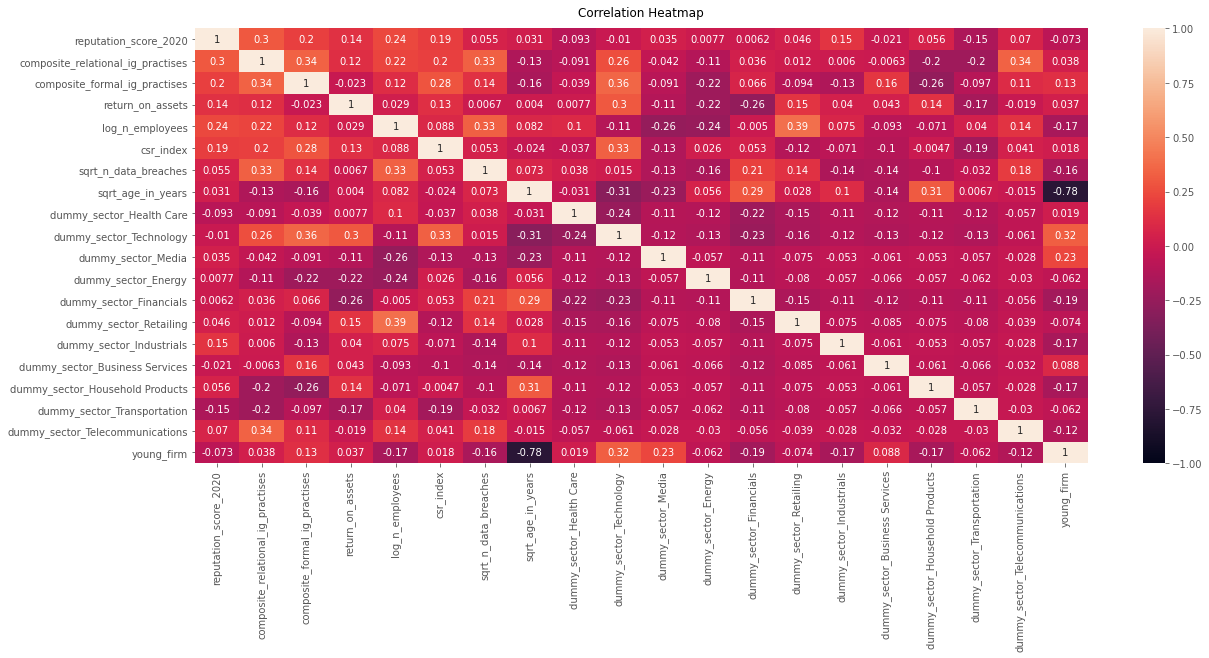

In [24]:
plt.rcParams["figure.figsize"] = [20, 8]
heatmap = sns.heatmap(df_model[corr_columns].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [25]:
def scientific_correlation_table(dataf, index_renames=None):
    """"""
    
    mean_values = ['{:.2f}'.format(v) for v in df_model[sc_corr_table_columns].mean().values]
    std_values = ['{:.2f}'.format(v) for v in df_model[sc_corr_table_columns].std().values]
    columns = ['Mean', 'S.D.']
    table_values = [mean_values, std_values]
    
    indices = []
    count = 0
    for mainc in dataf.columns:
        pcor_outputs = []
        for corc in dataf.columns:
            output = generate_pcor_and_pstars(df_model[corc], df_model[mainc])
            pcor_outputs.append(output)
        none_values = [None for v in range(count)]
        values_include = pcor_outputs[-(len(pcor_outputs)-count):]
        final_values = [*none_values, *values_include]
        table_values.append(final_values)
        indices.append(f'{count+1}. {mainc}')
        columns.append(f'{count+1}.')
        count += 1
        
    if index_renames != None:
        indices = [f"{x.split('. ')[0]}. {new_index_names[x.split('. ')[1]]}" for x in indices]
        
    return pd.DataFrame(np.column_stack(table_values), index=indices, columns=columns)


def generate_pcor_and_pstars(values1, values2):
    """"""
    
    output = stats.pearsonr(values1, values2)
    
    if output[0] > 0.99999:
        sig = ''
    elif output[1] <= 0.001:
        sig = '***'
    elif output[1] <= 0.01:
        sig = '**'
    elif output[1] <= 0.05:
        sig = '*'
    else:
        sig = ''
        
    return '{:.2f}{}'.format(output[0], sig)

In [26]:
new_index_names = {
    'reputation_score_2020': 'Corporate Reputation Score',
    'composite_relational_ig_practises': 'Relational IG Practises Composite ',
    'composite_formal_ig_practises': 'Formal IG Practises Composite ',
    'return_on_assets': 'Return on Assets',
    'log_n_employees': 'Log Number of Employees',
    'csr_index': 'CSR Index',
    'sqrt_n_data_breaches': 'Square Root Number of Data Breaches',
    'sqrt_age_in_years': 'Square Root Age',
}

sc_corr_table_columns = [x for x in corr_columns if 'dummy' not in x and x != 'young_firm']

df_sc_correlation_table = scientific_correlation_table(df_model[sc_corr_table_columns], new_index_names)

In [27]:
df_sc_correlation_table

,Mean,S.D.,1.,2.,3.,4.,5.,6.,7.,8.
1. Corporate Reputation Score,6.68,0.62,1.00,None,None,None,None,None,None,None
2. Relational IG Practises Composite,0.45,0.12,0.30***,1.00,None,None,None,None,None,None
3. Formal IG Practises Composite,0.33,0.19,0.20*,0.34***,1.00,None,None,None,None,None
4. Return on Assets,0.06,0.05,0.14,0.12,-0.02,1.00,None,None,None,None
5. Log Number of Employees,10.76,1.10,0.24**,0.22**,0.12,0.03,1.00,None,None,None
6. CSR Index,0.03,0.03,0.19*,0.20*,0.28***,0.13,0.09,1.00,None,None
7. Square Root Number of Data Breaches,0.66,0.83,0.06,0.33***,0.14,0.01,0.33***,0.05,1.00,None
8. Square Root Age,6.46,2.50,0.03,-0.13,-0.16,0.00,0.08,-0.02,0.07,1.00


In [28]:
with pd.ExcelWriter('../data/modeloutput/scientific_correlation_table.xlsx', mode='w') as writer:  
    df_sc_correlation_table.to_excel(writer, sheet_name='table')